## Reduce NGC 253 NIRSPAO observations using my `spec_lib` module, mainly `spec_lib.redspec` 

In [1]:
import matplotlib, pylab, os, sys, astropy, copy
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')
from astropy.io import fits
from astropy.visualization import ImageNormalize, AsinhStretch, SqrtStretch, MinMaxInterval, ZScaleInterval
from astropy.time import Time

In [8]:
import ccdproc as ccdp
#from ccdproc import ImageFileCollection


rawpath='/Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/'
redpath="./"
pre='nspec190814_'
# DEFINE OBJECT IN FITS HEADERS TO IDENTIFY FILES
objname="NGC253"
skyname="SKY"
std1name = "HD225200"
std2name = "HD3604"

In [10]:
rawic=ccdp.ImageFileCollection(rawpath,glob_include=pre+'*.fits') 

# make masks to group images by type
flats=(rawic.summary['halogen'] == 'On') & (rawic.summary['neon'] == 'Off') & (rawic.summary['argon'] == 'Off') & \
(rawic.summary['krypton'] == 'Off') & (rawic.summary['xenon'] == 'Off') & \
(rawic.summary['calmpos'] == 'In')
# dark exposures
darks = (rawic.summary['halogen'] == 'Off') & (rawic.summary['neon'] == 'Off') & (rawic.summary['argon'] == 'Off') & \
(rawic.summary['krypton'] == 'Off') & (rawic.summary['xenon'] == 'Off') & \
(rawic.summary['calmpos'] == 'In')
# arc-lamp spectra
arcs = (rawic.summary['halogen'] == 'Off') & ( (rawic.summary['neon'] == 'On') | (rawic.summary['argon'] == 'On') | \
(rawic.summary['krypton'] == 'On') | (rawic.summary['xenon'] == 'On') )& \
(rawic.summary['calmpos'] == 'In')
# calibration/standard stars (HD3604 and HD225200)
std1 = (rawic.summary['object'] == std1name)
std2 = (rawic.summary['object'] == std2name)
# science object (NGC 253) and sky frames
obj= rawic.summary['object'] == objname
sky= rawic.summary['object'] == skyname
#

# Define file lists
darkfiles=[rawpath+f for f in rawic.summary['file'][darks]]
flatfiles=[rawpath+f for f in rawic.summary['file'][flats]]
arcfiles=[rawpath+f for f in rawic.summary['file'][arcs]]
std1files=[rawpath+f for f in rawic.summary['file'][std1]][1:][-4:]
std2files=[rawpath+f for f in rawic.summary['file'][std2]][1:][-4:]
objfiles=[rawpath+f for f in rawic.summary['file'][obj]]
skyfiles=[rawpath+f for f in rawic.summary['file'][sky]]

# Define image file collections (ccdproc)
flatic = ccdp.ImageFileCollection(filenames=flatfiles)
darkic = ccdp.ImageFileCollection(filenames=darkfiles)
arcic= ccdp.ImageFileCollection(filenames=arcfiles)
std1ic=ccdp.ImageFileCollection(filenames=std1files)
std2ic=ccdp.ImageFileCollection(filenames=std2files)
objic=ccdp.ImageFileCollection(filenames=objfiles)
skyic=ccdp.ImageFileCollection(filenames=skyfiles)
# n253frameno=range(53,57)+range(58,62)+range(63,74) # 57 and 62 are sky frames
# skyframeno=[57,62]
# flatframeno=range(6,16) # should be frame 6 through 15
# darkframeno=range(18,25) # frame 16 through 25

# stdframeno=[82,83,84,85] # standard star HD12365 ABBA frame number

In [11]:
import sys

In [12]:
sys.path.insert(0,"/Users/dcohen/RESEARCH/PyNIRSPEC")

In [13]:
import spec_lib

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Make master normalized flat

In [16]:

# flatlist=[rawpath+filpre+"%04d.fits"%n for n in ]
# darklist=[rawpath+filpre+"%04d.fits"%n for n in darkframeno]

nflat=spec_lib.redflat(flatfiles,outimage=redpath+"NFlat.fits",normalize=True,rectmap=redpath+"spec.map",\
                       norm_xrange= (0,2000), norm_thresh = 1000., clean=False, darkimage=None)

Reducing and combining flat frames...


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0053.fits
./spec/s0053
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.34 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


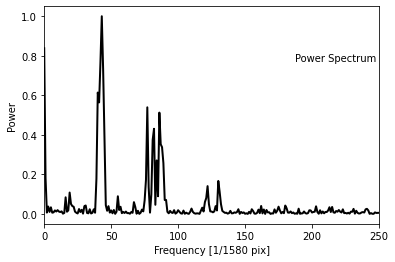

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  65,95
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  120,140
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0054.fits
./spec/s0054
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.33 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


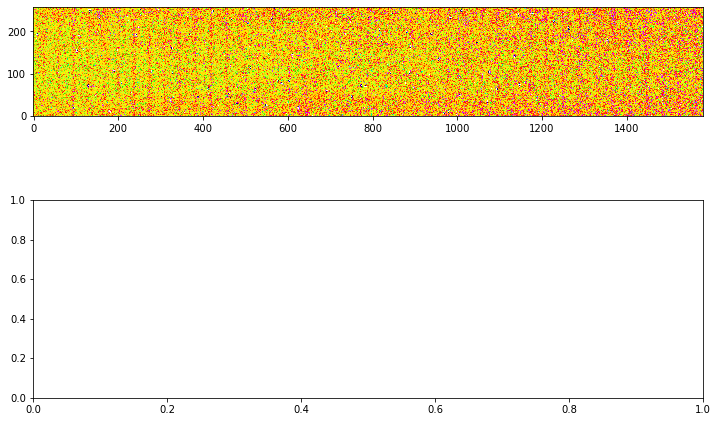

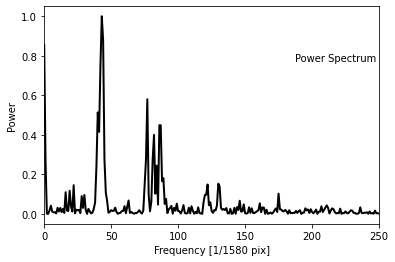

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  65,95
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  120,140
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0055.fits
./spec/s0055
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.31 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


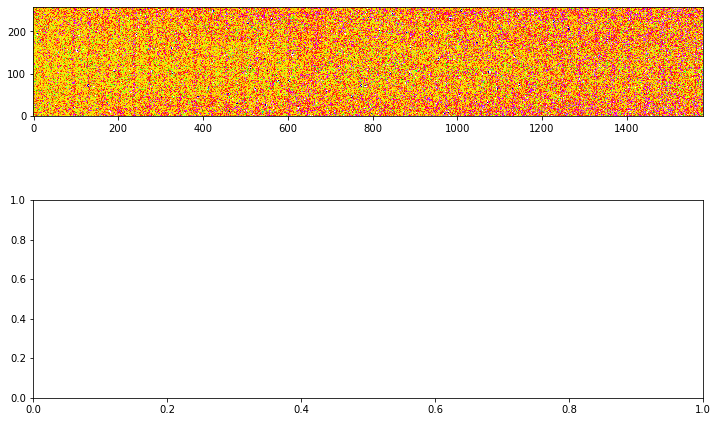

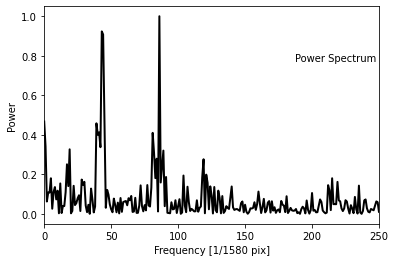

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  120,140
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0056.fits
./spec/s0056
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.29 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


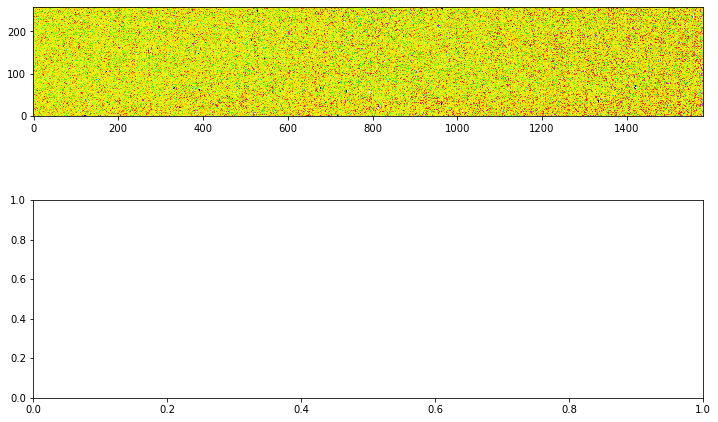

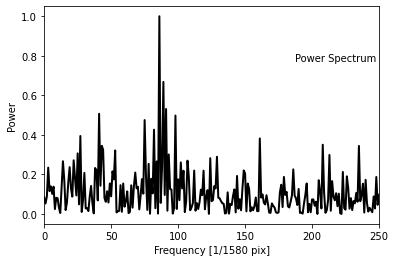

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0058.fits
./spec/s0058
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.24 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


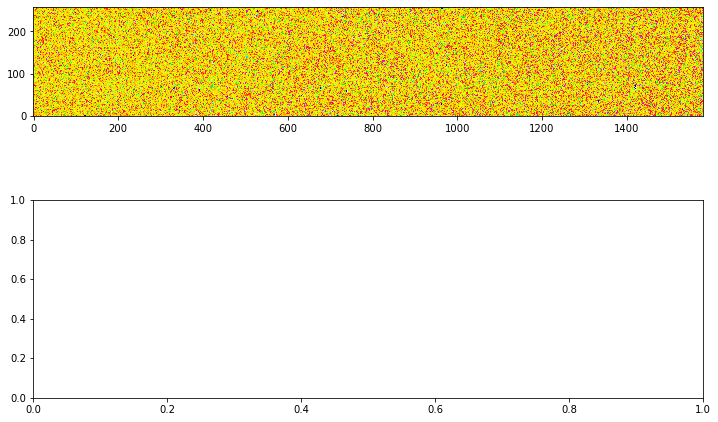

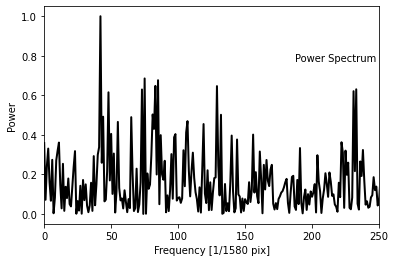

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0059.fits
./spec/s0059
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.22 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


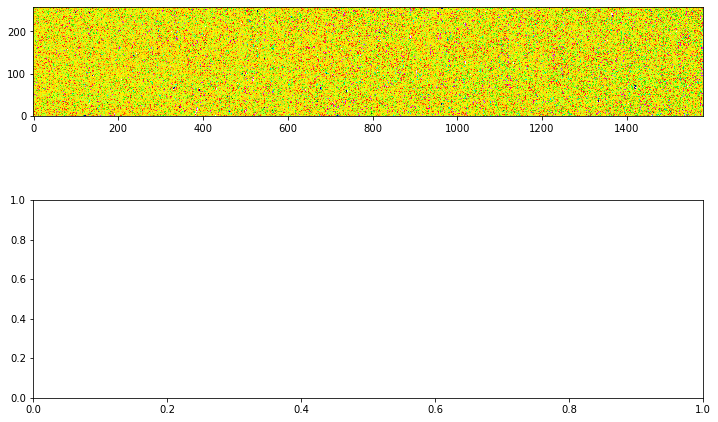

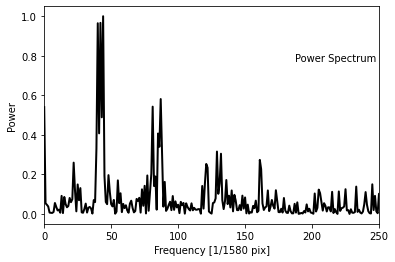

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  120,140
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0060.fits
./spec/s0060
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.13 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


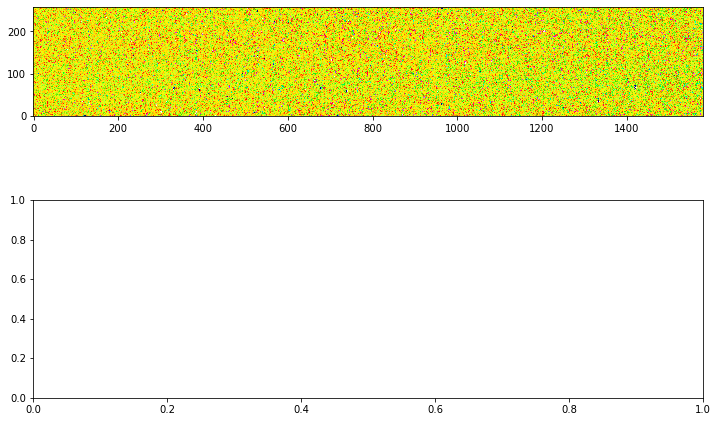

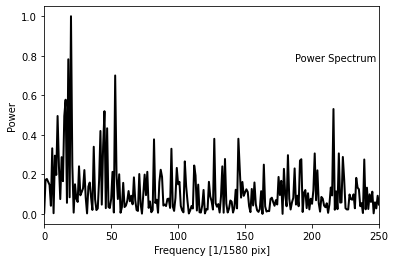

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0061.fits
./spec/s0061
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.10 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


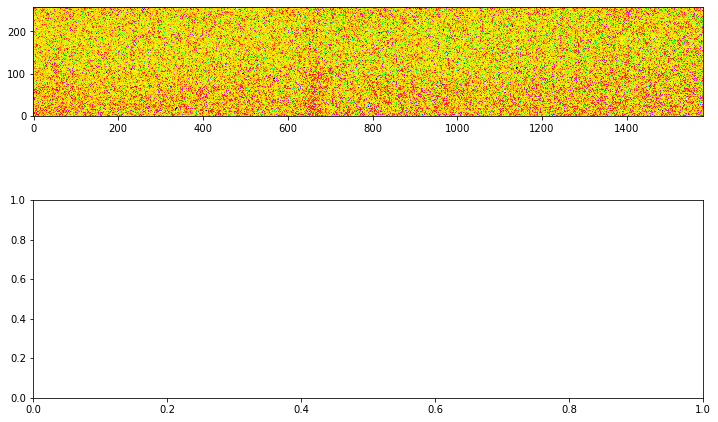

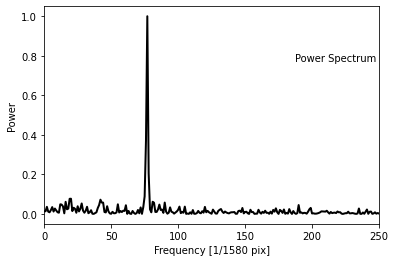

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  70,85
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0063.fits
./spec/s0063
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.07 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


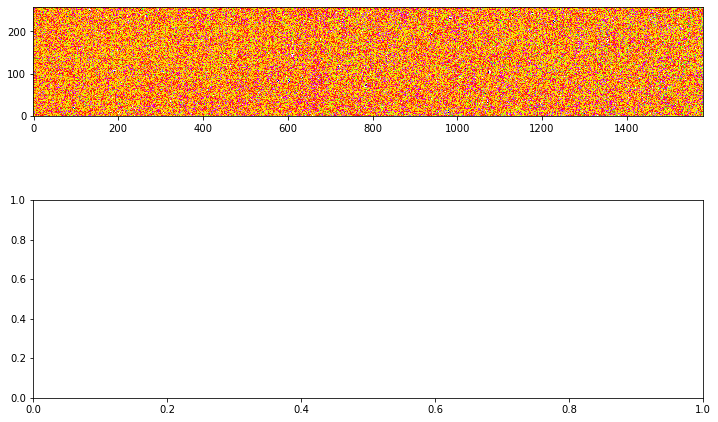

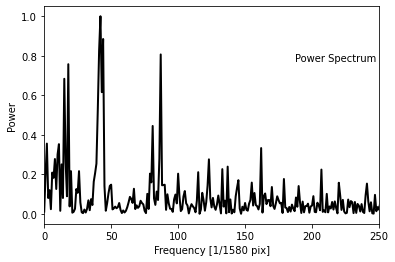

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0064.fits
./spec/s0064
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.04 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


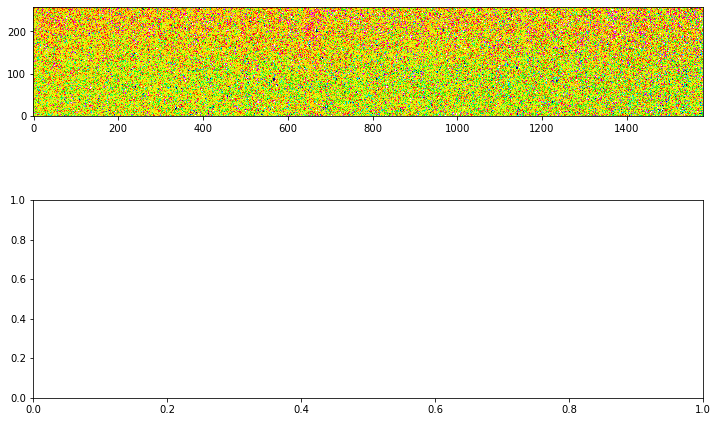

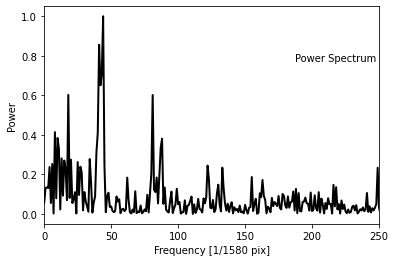

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0065.fits
./spec/s0065
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 16.02 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


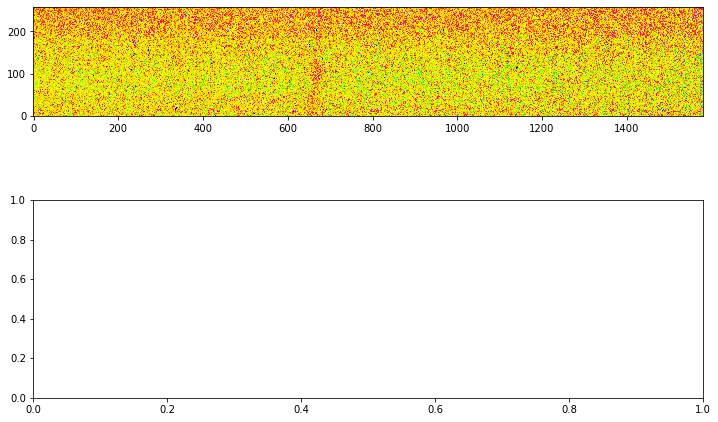

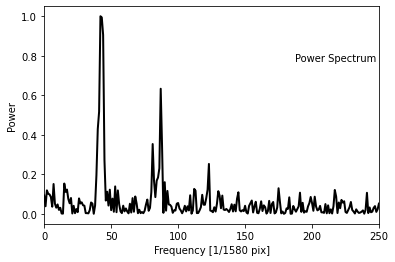

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0066.fits
./spec/s0066
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.99 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


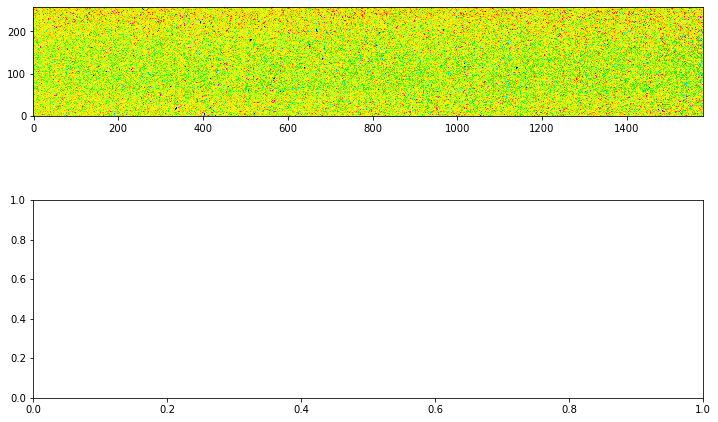

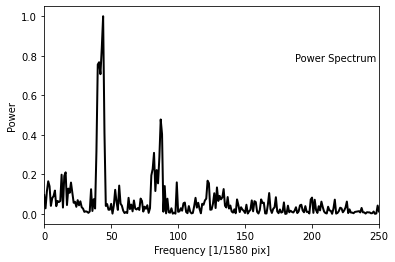

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0067.fits
./spec/s0067
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.97 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


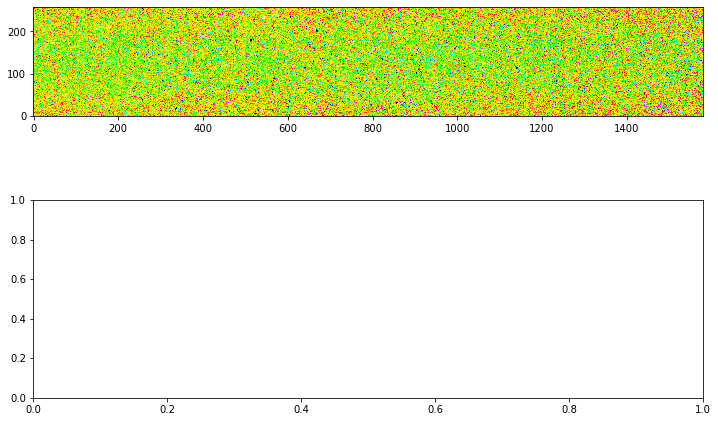

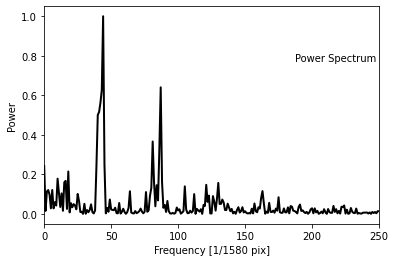

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0068.fits
./spec/s0068
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.94 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


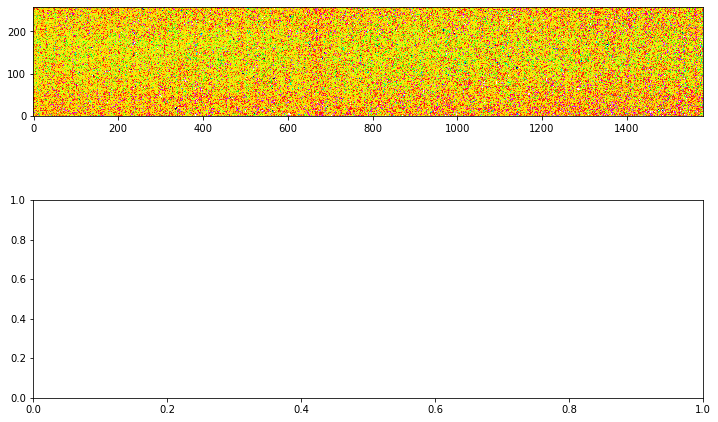

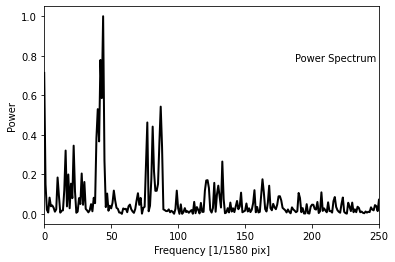

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  120,140
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0069.fits
./spec/s0069
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.91 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


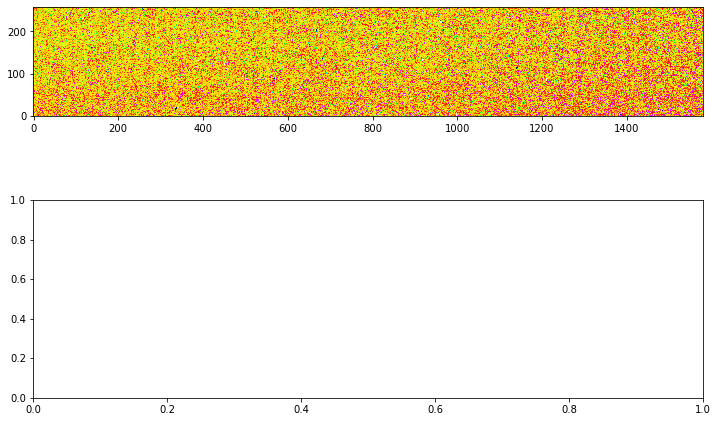

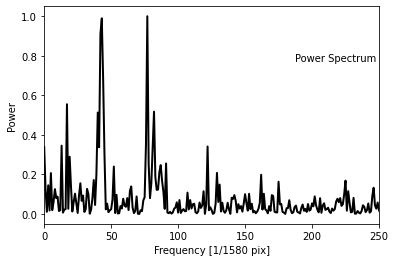

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  75,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0070.fits
./spec/s0070
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.91 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


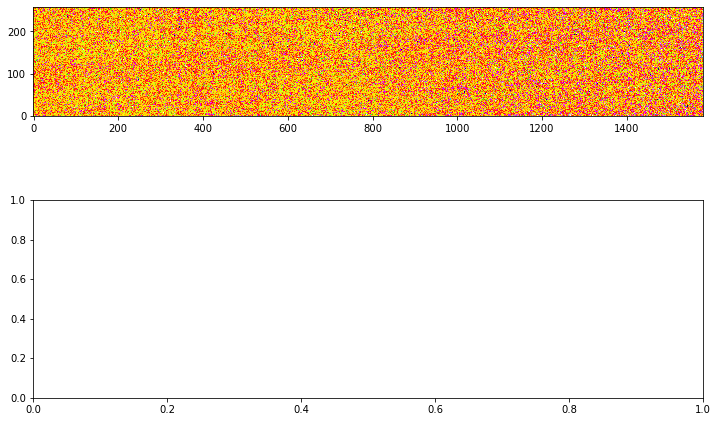

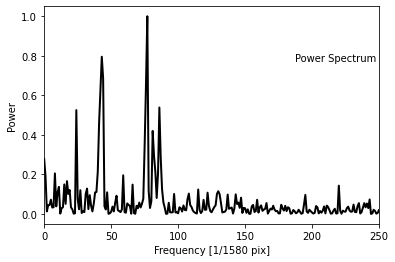

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  70,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0071.fits
./spec/s0071
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.90 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


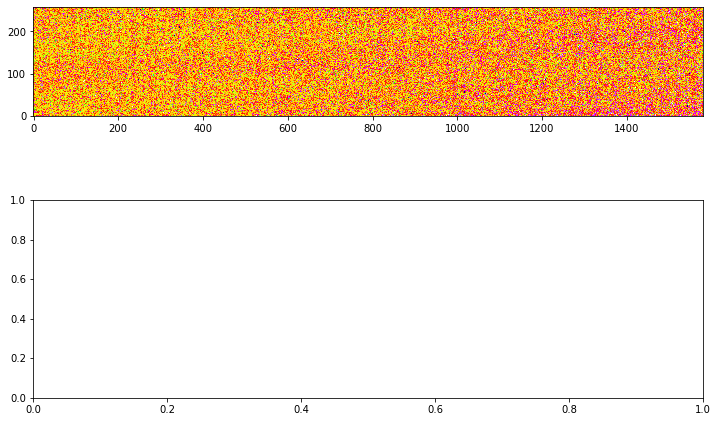

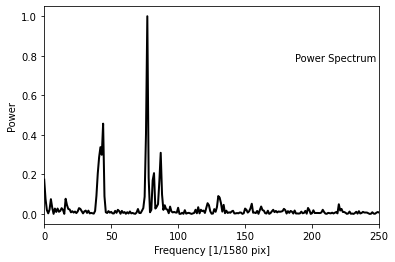

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  65,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0072.fits
./spec/s0072
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.89 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


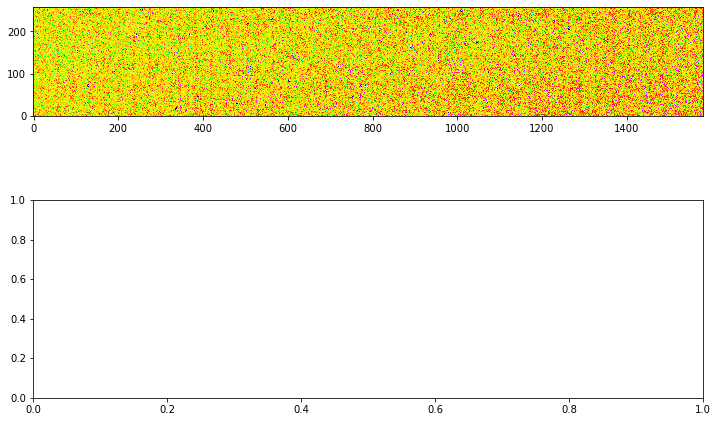

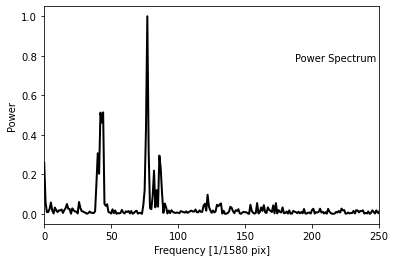

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  65,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


Object frame:  /Users/dcohen/RESEARCH/NGC253_NIRSPAO/Data/NIRSPEC/2019aug14/raw/spec/rotated/nspec190814_0073.fits
./spec/s0073
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 15.88 heliocentric correction: 
Updating fits header...
SHAPE OF FINAL SPECTRUM:  1580 258


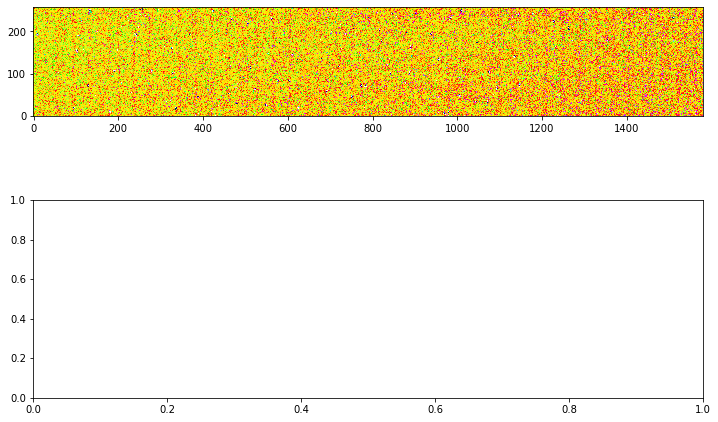

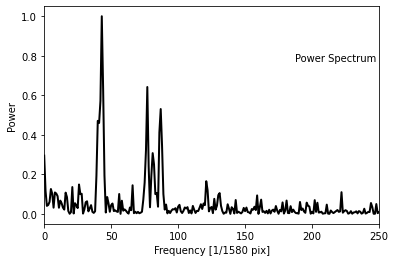

Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  40,49
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  65,90
Enter low and high frequency bounds for range to remove, hit return after each window: `flo1,fhi1':  q


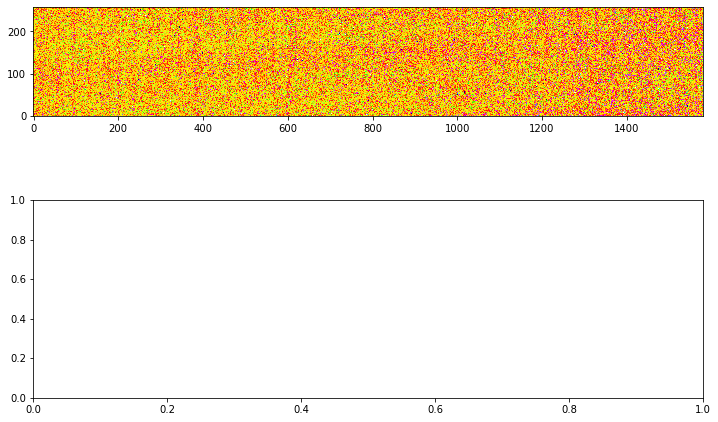

In [33]:
#%matplotlib inline
#plt.rcParams['figure.figsize'] = [20,15]

tar='NGC253'
# objlist=[rawpath+filpre+"%04d.fits"%n for n in maf2frameno]
fflat=redpath+"NFlat.fits"
#fflat=rawpath+"Flats/flat_norm.fits"#NFlat.fits"
#fsky=rawpath+filpre+"0097.fits"
#fsky=rawpath+"Sky/maf2_sky_avg.fits"#filpre+"0097.fits"
# skylist=[rawpath+filpre+"%04d.fits"%n for n in skyframeno]
# ixsky=[0,0,0,0,0,2,2,2]
tsky=[fits.getheader(f)['mjd'] for f in skyfiles]
amsky=[fits.getheader(f)['airmass'] for f in skyfiles]


outdir=redpath+'spec/'
# bkgsec=([0,280,0,52],[0,280,122,-1],[450,-1,0,52],[450,-1,122,-1])

inum=0
for f in objfiles:
    # find closest sky exposure\
    print("Object frame: ",f)
    tobj=fits.getheader(f)['mjd']
    amobj=fits.getheader(f)['airmass']
#     tsky=tsky[]
#     amsky=fits.getheader(fsky)['airmass']
    isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
    #iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    #fsky=skylist[iam]
#     isky=ixsky[inum]
#     print("Object spectrum %s, taken at (time,airmass): %s,  %s"%(f,tobj,amobj))
#     print("Using sky spectrum %s, taken at (time,airmass): %s,  %s"%(skyfiles[isky],tsky[isky],amsky[isky]))
    outname=outdir+"s"+f[-9:-5]
   # print(outname)
    print(outname)
    obj,var = spec_lib.redspec(f,outname+".fits",offimage=skyfiles[isky],flatimage=fflat, target=tar,\
                           trim_bounds=[20,1600,8,266],mode=1,\
                                bkg_subtract=False,bkg_order=2,#trim_bounds=[0,1000,8,156],\
                           fringe_corr=False,restwav=4.052262,\
                           spatmap=redpath+'spat.map',specmap=redpath+'spec.map')
    
    fits.writeto(outname+".var.fits",data=var,header=obj.header,overwrite=True)
    
    datcorr = spec_lib.fringecor(obj.data,medwidth=101,freq_bounds=[(40,49),(75,90),(120,140)])
    
    fits.writeto(outname+".corr.fits",data=datcorr,header=obj.header,overwrite=True)
    
    inum+=1
    
    # DISPLAY REDUCED SPECTRUM
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(211)
    zlim=ZScaleInterval().get_limits(obj.data)
    ax.imshow(obj.data,origin='lower',interpolation='None',cmap='gist_ncar',vmin=zlim[0],vmax=zlim[1])
    ax=fig.add_subplot(212)
   # zlim=ZScaleInterval().get_limits(err)
#     v=ax.imshow(var,origin='lower',interpolation='None',cmap='gist_ncar',vmin=0.)
#     plt.colorbar(v)
#     ax=fig.add_subplot(313)
#     zlim=ZScaleInterval().get_limits(datcorr)
#     ax.imshow(datcorr,origin='lower',interpolation='None',cmap='gist_ncar',vmin=zlim[0],vmax=zlim[1])
#     plt.show()



### Reduce standard star HD12365

In [ ]:
print(std2files)
std1_1 = spec_lib.redspec(std1files[1],'spec/hd225200.1.fits',offimage=std1files[0],flatimage="NFlat.fits", \
                         target="HD225200",spatmap='spat.map',specmap='spec.map')
std1_2 = spec_lib.redspec(std1files[2],'spec/hd225200.2.fits',offimage=std1files[3],flatimage="NFlat.fits", \
                         target="HD225200",spatmap='spat.map',specmap='spec.map')

# std2 = spec_lib.redspec(stdlist[2],'hd12365.2.fits',offimage=stdlist[3],flatimage="NFlat.fits", target="HD36404",spatmap='spat.map',specmap='spec.map')
# std2fr = spec_lib.redspec(stdlist[2],'hd12365.2.fringe.fits',offimage=stdlist[3],flatimage="NFlat.fits", target="HD12365",\
#                        fringe_corr=True,fringe_width=37,spatmap='spat.map',specmap='spec.map')

# # average the two
fits.writeto("hd225200.fits", data=np.mean([std1_1.data,std1_2.data],0), header=std1_1.header, overwrite=True )


### Reduce NGC 253

First run with full capability, including background subtraction+fringe correction. Then run without bg sub or fringe. Finally, try with just fringe.

In [ ]:
##### %matplotlib inline
plt.rcParams['figure.figsize'] = [20,15]
#objlist=[f for f in objic.files]
hsky=[fits.getheader(f) for f in skyic.files]
tsky=np.array([Time(h['date-obs']+'T'+h['utc'],scale='utc').to_value('mjd','long') for h in hsky])
amsky=[fits.getheader(f)['airmass'] for f in skyic.files]

# make average sky image
skystack=[]
for f in skyic.files:
    
    skystack.append(fits.getdata(f))
    
sky=np.ma.mean(skystack,0)
fits.writeto("Sky.fits",data=sky.data,header=fits.getheader(f),overwrite=True)


for f in objic.files:
    # find closest sky exposure\
    print("Object frame: ",f)
    hdr=fits.getheader(f)
    tobj=Time(hdr['date-obs']+'T'+hdr['ut'],scale='utc').to_value('mjd','long')
    #amobj=fits.getheader(f)['airmass']
    isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
    #iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    fsky=skyic.files[isky]
    #print("Closest sky in (time,airmass): %s,  %s"%(fsky.split('/')[-1],skylist[isky].split('/')[-1]))
    outname='s'+f[-9:-5]
   # print(outname)
    obj = spec_lib.redspec(f,'spec/'+outname+".fits",offimage=fsky,flatimage="NFlat.fits", target="NGC253",\
                           bkg_subtract=False,fringe_corr=False)
    
    objsub = spec_lib.redspec(f,'spec/'+outname+".sub.fits",offimage=fsky,flatimage="NFlat.fits", target="NGC253",\
                           bkg_subtract=True,fringe_corr=False)
    
    objcorr = spec_lib.redspec(f,'spec/'+outname+".corr.fits",offimage=fsky,flatimage="NFlat.fits", target="NGC253",\
                           bkg_subtract=False,fringe_corr=True,fringe_width=37)
    
    

In [ ]:
kern=Box2DKernel(5)
hsky=[h for h in skyic.hdus()]
skydat=[]
skymask=[]
mjdsky=[]
for h in hsky:
    print("Image: ",h.header['ofname'])
    dat=h.data.copy()
    print("Exposure time: ",h.header['elaptime'])
    #print("Cleaning CRs...")
    #print(h.header['date-obs']+'T'+h.header['utstart'])
    mjdsky.append(Time(h.header['date-obs']+'T'+h.header['utstart'],format='isot').mjd)

    skydat.append( dat)

mjdsky=np.array(mjdsky)  
skycomb=np.mean(skydat,0)#.mean(axis=0)
#skypix=np.sum(1-skymask).astype(float)
#skycomb/=2.0
#skycomb=np.mean(skydat,axis=0)

fits.writeto("spec/Sky_avg.fits",data=skycomb,header=h.header,overwrite=True)

In [ ]:







%matplotlib inline
plt.rcParams['figure.figsize'] = [14,12]
objlist=[rawpath+filpre+"%04d.fits"%n for n in maf2frameno]
skylist=[rawpath+filpre+"%04d.fits"%n for n in skyframeno]
tsky=[fits.getheader(f)['mjd-obs'] for f in skylist]
amsky=[fits.getheader(f)['airmass'] for f in skylist]

for f in objlist:
    # find closest sky exposure\
    print("Object frame: ",f)
    tobj=fits.getheader(f)['mjd-obs']
    amobj=fits.getheader(f)['airmass']
    isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
    iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    fsky=skylist[isky]
    print("Closest sky in (time,airmass): %s,  %s"%(fsky.split('/')[-1],skylist[iam].split('/')[-1]))
    outname=f[-10:-5]+".corr.fits"
   # print(outname)
    obj = spec_lib.redspec(f,outname,offimage=skylist[isky],flatimage="NFlat.fits", target="Maffei 2",\
                       spatmap='spat.map',specmap='spec.map', bkg_subtract=True, bkg_box_range=[8,40], fringe_corr=True, fringe_width=37)

## NGC 1569

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]
objlist=[rawpath+filpre+"%04d.fits"%n for n in n1569frameno]
skylist=[rawpath'+filpre+"%04d.fits"%n for n in skyframeno]
tsky=[fits.getheader(f)['mjd-obs'] for f in skylist]
amsky=[fits.getheader(f)['airmass'] for f in skylist]

for f in objlist:
    # find closest sky exposure\
    print("Object frame: ",f)
    tobj=fits.getheader(f)['mjd-obs']
    amobj=fits.getheader(f)['airmass']
    isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
    iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    fsky=skylist[isky]
    print("Closest sky in (time,airmass): %s,  %s"%(fsky.split('/')[-1],skylist[iam].split('/')[-1]))
    outname=f[-10:-5]
   # print(outname)
    obj = spec_lib.redspec(f,outname+".fits",offimage=skylist[isky],flatimage="NFlat.fits", target="NGC1569",\
                       spatmap='spat.map',specmap='spec.map', bkg_subtract=False, bkg_box_range=[8,40], fringe_corr=False, fringe_width=37)
    objcorr = spec_lib.redspec(f,outname+".corr.fits",offimage=skylist[isky],flatimage="NFlat.fits", target="NGC1569",\
                       spatmap='spat.map',specmap='spec.map', bkg_subtract=True, bkg_box_range=[8,40], fringe_corr=True, fringe_width=37)

## Do SCAM reduction, grouped by slit position

In [ ]:
from ccdproc import ImageFileCollection

scampath='/Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/scam/'
scampre='dec07i'
skyic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in skyframeno])#,keywords=['ofname','framenum','elaptime',\
maf2ic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in maf2frameno])#       'utstart','utend','mjd-obs','date-obs'])
n1569ic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in n1569frameno])
scamic= ImageFileCollection(scampath,glob_include=scampre+'*.fits')

In [ ]:
# make slit mask
scamfiles=[scampath+f for f in scamic.files]

slit=spec_lib.mkslitreg(scamfiles[0],wgrow=2.5,lgrow=1.03)
# plt.imshow(1-slit,origin='lower',cmap='binary')
# plt.show()

### Get SCAM sky frames, group and average according to slit position and make a list of averaged sky frames

In [ ]:
# assuming scamic is defined to be the image collection of ALL scam images (sci+sky)
from astropy.time import Time
import astropy.units as u

pathout="./Maf2/scam/"
#mjdsky=[Time(fits.getheader(f)['date-obs']+'T'+fits.getheader(f)['utc'],
#             format='isot',scale='utc').mjd for f in skyic.files] # MJD

#print(hsc[0])
# scamfiles=[f for f in scamic.files] 
for fspec in skyic.files:
    
    #~~ SPEC FILE 
    hsp=fits.getheader(fspec)

    # FIND SCAM IMAGE MATCHES
    matches=spec_lib.match_spec_scam(fspec, scamfiles)
    print("Num matches: ",np.size(np.where(matches==True)))
    #print(matches)
    ixmatch=np.where(matches==True)[0]
    print(ixmatch)
    matchfiles=np.array(scamfiles)[ixmatch]
   # matchfiles=scamic.files[np.where(matches==True)]
    #matchic=scam[matches]
    print(matchfiles)
   # print(matchic.summary['framenum'])
    
    #~~ Reduce and combine matched SCAM frames for sky images
    images=[]
    mjdobs=[]
    framenums=[]
    for f in matchfiles:
        h=fits.open(f)[0]
        dat=h.data
        hdr=h.header
        mjdobs.append( (Time(hdr['date-obs']+'T'+hdr['utc'],scale='utc') + hdr['elaptime']*u.s ).to_value('mjd','long'))
        framenums.append(hdr['frameno'])
        # clean cosmics from sky   
      #  print(np.median(dat))
        datcl,bpmask=spec_lib.cosmic_clean(dat.copy(),sigclip=5.0,objlim=1.0,sigfrac=0.1,mask=slit)
      #  print(np.median(datcl))
        # try to mask sources in the sky frame before subtraction
#         meansky,medsky,stdsky=sigma_clipped_stats(sdat,mask=slit,cenfunc=np.nanmedian,\
#                                               stdfunc=np.nanstd,sigma_lower=5.0,sigma_upper=5.0,maxiters=5)
#         smask=sdat >= (medsky + 2.5*stdsky) # non-soruce bckground, to be subtracted
#         sdat*= (1-smask.astype(int))
        
        #fits.writeto(pathout+fname[-9:-5]+"sub.fits",data=dat,header=hdr,overwrite=True)
        images.append(datcl)# np.ma.masked_array(datred,mask=bpmask ) )
       # masks.append( bpmask )
        #masks.append( crmask )
        #mjd.append(hdu.header['mjd-obs'])
    imcomb=np.ma.mean( images, axis=0 )
    print(np.median(imcomb))
    hdrcomb=hdr.copy()
    #hdrcomb['framenum']=hsp['framenum']
    hdrcomb['frameno']=hsp['frameno']
    #hdrcomb['mjd-obs']=hsp['mjd-obs']
    hdrcomb['mjd-avg']=np.mean( mjdobs )
    hdrcomb['exptime']=hdr['elaptime']
    hdrcomb['history']='Images combined: '
    for f in matchfiles:
        hdrcomb[''] = f
    outname='nscam_avg_s%04d.fits'%hsp['frameno']
    fits.writeto(pathout+outname,data=imcomb.data,header=hdrcomb,overwrite=True)

In [ ]:
# assuming scamic is defined to be the image collection of ALL scam images (sci+sky)
from astropy.time import Time
from astropy.stats import sigma_clipped_stats,sigma_clip
import astropy.units as u

#skylist=['nscam_avg_s%04d.fits'%n for n in (91,92,93,97)]
#skydat=np.array([fits.getdata(f) for f in skylist])
#skydat=fits.getdata(scampath+"Sky2.fits")
skydat=fits.getdata("./Maf2/scam/sky.fits")
#skyflat=fits.getdata(scampath+"NSkyflat.fits")
#tsky=np.array([Time(fits.getheader(f)['mjd-avg'],format='mjd').to_value('mjd','long') for f in skylist])
pathout="./Maf2/scam/"
for fspec in maf2ic.files:
    
    #~~ SPEC FILE 
    hsp=fits.getheader(fspec)

    # FIND SCAM IMAGE MATCHES
    matches=spec_lib.match_spec_scam(fspec, scamfiles)
    print("Num matches: ",np.size(np.where(matches==True)))
    #print(matches)
    ixmatch=np.where(matches==True)[0]
  #  print(ixmatch)
    matchfiles=np.array(scamfiles)[ixmatch]
   # matchfiles=scamic.files[np.where(matches==True)]
    #matchic=scam[matches]
    print(matchfiles)
   # print(matchic.summary['framenum'])
    
    #~~ Reduce and combine matched SCAM frames for sky images
    images=[]
    mjdobs=[]
    framenums=[]
    for f in matchfiles:
        h=fits.open(f)[0]
        dat=h.data
        hdr=h.header
        tobs=(Time(hdr['date-obs']+'T'+hdr['utc'],scale='utc') + hdr['elaptime']*u.s ).to_value('mjd','long')
        mjdobs.append(tobs)
        framenums.append(hdr['frameno'])
        # clean cosmics from sky   
        #dat,bpmask=spec_lib.cosmic_clean(dat.copy(),sigclip=5.0,sigfrac=0.2,mask=slit)

        #fits.writeto(pathout+fname[-9:-5]+"sub.fits",data=dat,header=hdr,overwrite=True)
        
        
        # try to mask sources in the sky frame before subtraction
       # datsub = 
        datsub = dat - skydat #/ skyflat
        mean,med,std=sigma_clipped_stats(datsub,mask=slit,sigma_lower=1.0,cenfunc=np.nanmedian,stdfunc=np.nanstd)
        negmask = datsub < med-1.5*std 
        
        # find best sky to use and subtract
#         dt= tobs - tsky
#         isky=np.argmin(np.abs(dt))
#         sdat=skydat[isky]
        
        # try to mask sources in the sky frame before subtraction. do by forming sky - data, masking all negative pixels
        # and detecting sources
        #datcl,bpmask=spec_lib.cosmic_clean(datsub,sigclip=5.0,sigfrac=0.2,mask=slit)
#         skysubdat=sdat-dat
#         meansky,medsky,stdsky=sigma_clipped_stats(np.ma.masked_array(sdat,mask=slit), sigma_lower=4.0,sigma_upper=4.0,maxiters=5,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         print(meansky,medsky)
#         skysources=skysubdat>=(medsky + 1.0*stdsky)
#         skyclip=sigma_clip(np.ma.masked_array(skysubdat,mask=slit), sigma_lower=0.,sigma_upper=2.5,maxiters=3,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
        plt.figure()
        zlim=ZScaleInterval().get_limits(datsub)
        plt.imshow(datsub,origin='lower',vmin=zlim[0],vmax=zlim[1])
        plt.show()
        
        images.append(np.ma.masked_array(datsub, mask=slit | negmask))
        #meansky,medsky,stdsky=SigmaClip(sdat,mask=slit,cenfunc=np.nanmedian,\
        #                                      stdfunc=np.nanstd,sigma_lower=1.0,sigma_upper=2.0,maxiters=5)
        #smask=sdat >= (medsky + 2.0*stdsky) # non-soruce bckground, to be subtracted
        #sdat*= (1-smask.astype(int))
        
       # dat=dat-skyclip 
        
        #nmask=dat<=-0.
        
        # subtract residual median bkg
       # meanbg,medbg,stdbg=sigma_clipped_stats(dat,mask=(smask|slit),cenfunc=np.nanmedian,\
          #                                    stdfunc=np.nanstd,sigma_lower=5.0,sigma_upper=1.5,maxiters=5)
        
   #     images.append(np.ma.masked_array(dat,mask=dat<0.) )# np.ma.masked_array(datred,mask=bpmask ) )
       # masks.append( bpmask )
        #masks.append( crmask )
        #mjd.append(hdu.header['mjd-obs'])
    imcomb=np.ma.mean( images, axis=0 )
    hdrcomb=hdr.copy()
    #hdrcomb['framenum']=hsp['framenum']
    hdrcomb['frameno']=hsp['frameno']
    hdrcomb['mjd-obs']=hsp['mjd-obs']
    hdrcomb['mjd-avg']=np.mean( tobs )
    hdrcomb['exptime']=hdr['elaptime']
    hdrcomb['history']='Images combined: '
    for f in matchfiles:
        hdrcomb[''] = f
    outname='nscam_avg_s%04d.fits'%hsp['frameno']
    fits.writeto(pathout+outname,data=imcomb.data,header=hdrcomb,overwrite=True)

In [ ]:
# assuming scamic is defined to be the image collection of ALL scam images (sci+sky)
from astropy.time import Time
from astropy.stats import sigma_clipped_stats,sigma_clip
import astropy.units as u

#skylist=['nscam_avg_s%04d.fits'%n for n in (91,92,93,97)]
#skydat=np.array([fits.getdata(f) for f in skylist])
#skydat=fits.getdata(scampath+"Sky2.fits")
skydat=fits.getdata("./N1569/scam/sky.fits")
#skyflat=fits.getdata(scampath+"NSkyflat.fits")
#tsky=np.array([Time(fits.getheader(f)['mjd-avg'],format='mjd').to_value('mjd','long') for f in skylist])
pathout="./N1569/scam/"
for fspec in n1569ic.files:
    
    #~~ SPEC FILE 
    hsp=fits.getheader(fspec)

    # FIND SCAM IMAGE MATCHES
    matches=spec_lib.match_spec_scam(fspec, scamfiles)
    print("Num matches: ",np.size(np.where(matches==True)))
    #print(matches)
    ixmatch=np.where(matches==True)[0]
  #  print(ixmatch)
    matchfiles=np.array(scamfiles)[ixmatch]
   # matchfiles=scamic.files[np.where(matches==True)]
    #matchic=scam[matches]
    print(matchfiles)
   # print(matchic.summary['framenum'])
    
    #~~ Reduce and combine matched SCAM frames for sky images
    images=[]
    mjdobs=[]
    framenums=[]
    for f in matchfiles:
        h=fits.open(f)[0]
        dat=h.data
        hdr=h.header
        tobs=(Time(hdr['date-obs']+'T'+hdr['utc'],scale='utc') + hdr['elaptime']*u.s ).to_value('mjd','long')
        mjdobs.append(tobs)
        framenums.append(hdr['frameno'])
        # clean cosmics from sky   
        #dat,bpmask=spec_lib.cosmic_clean(dat.copy(),sigclip=5.0,sigfrac=0.2,mask=slit)

        #fits.writeto(pathout+fname[-9:-5]+"sub.fits",data=dat,header=hdr,overwrite=True)
        
        
        # try to mask sources in the sky frame before subtraction
       # datsub = 
        datsub = dat - skydat #/ skyflat
        mean,med,std=sigma_clipped_stats(datsub,mask=slit,sigma_lower=1.0,cenfunc=np.nanmedian,stdfunc=np.nanstd)
        negmask = datsub < med-std 
        #datsub *= (1-negmask.astype(int))
        
        #datsub -= np.ma.median(np.ma.masked_array(datsub,mask=slit))
        #negmask = -datsub > 
        
        # find best sky to use and subtract
#         dt= tobs - tsky
#         isky=np.argmin(np.abs(dt))
#         sdat=skydat[isky]
        
        # try to mask sources in the sky frame before subtraction. do by forming sky - data, masking all negative pixels
        # and detecting sources
        #datcl,bpmask=spec_lib.cosmic_clean(datsub,sigclip=4.0,sigfrac=0.2,mask=slit)
#         skysubdat=sdat-dat
#         meansky,medsky,stdsky=sigma_clipped_stats(np.ma.masked_array(sdat,mask=slit), sigma_lower=4.0,sigma_upper=4.0,maxiters=5,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         print(meansky,medsky)
#         skysources=skysubdat>=(medsky + 1.0*stdsky)
#         skyclip=sigma_clip(np.ma.masked_array(skysubdat,mask=slit), sigma_lower=0.,sigma_upper=2.5,maxiters=3,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
        plt.figure()
        zlim=ZScaleInterval().get_limits(datcl)
        plt.imshow(datsub,origin='lower',vmin=zlim[0],vmax=zlim[1])
        plt.show()
        
        images.append(np.ma.masked_array(datsub, mask=slit | negmask))
        #meansky,medsky,stdsky=SigmaClip(sdat,mask=slit,cenfunc=np.nanmedian,\
        #                                      stdfunc=np.nanstd,sigma_lower=1.0,sigma_upper=2.0,maxiters=5)
        #smask=sdat >= (medsky + 2.0*stdsky) # non-soruce bckground, to be subtracted
        #sdat*= (1-smask.astype(int))
        
       # dat=dat-skyclip 
        
        #nmask=dat<=-0.
        
        # subtract residual median bkg
       # meanbg,medbg,stdbg=sigma_clipped_stats(dat,mask=(smask|slit),cenfunc=np.nanmedian,\
          #                                    stdfunc=np.nanstd,sigma_lower=5.0,sigma_upper=1.5,maxiters=5)
        
   #     images.append(np.ma.masked_array(dat,mask=dat<0.) )# np.ma.masked_array(datred,mask=bpmask ) )
       # masks.append( bpmask )
        #masks.append( crmask )
        #mjd.append(hdu.header['mjd-obs'])
    imcomb=np.ma.mean( images, axis=0 )
    hdrcomb=hdr.copy()
    #hdrcomb['framenum']=hsp['framenum']
    hdrcomb['frameno']=hsp['frameno']
    hdrcomb['mjd-obs']=hsp['mjd-obs']
    hdrcomb['mjd-avg']=np.mean( tobs )
    hdrcomb['exptime']=hdr['elaptime']
    hdrcomb['history']='Images combined: '
    for f in matchfiles:
        hdrcomb[''] = f
    outname='nscam_avg_s%04d.fits'%hsp['frameno']
    fits.writeto(pathout+outname,data=imcomb.data,header=hdrcomb,overwrite=True)